## Import Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from scipy.stats import pearsonr
import numpy as np
from sklearn.preprocessing import StandardScaler
import random
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import TruncatedSVD
from statsmodels.stats.proportion import proportions_ztest
import itertools

matchup_df = pd.read_csv('Data_Needs_updated_after_selection_sunday/Tournament Matchups.csv')
all_time_results_df = pd.read_csv('Data_Needs_updated_after_selection_sunday/Team Results.csv') 

# Read both CSVs and set 'TEAM NO' as the index
df_all = pd.read_csv("./Data_Needs_updated_after_selection_sunday/Resumes.csv")
df_temp = pd.read_csv("./Data_Needs_updated_after_selection_sunday/Shooting Splits.csv")
df_temp2 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/TeamRankings Away.csv")
df_temp3 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/TeamRankings Home.csv")
df_temp4 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/TeamRankings Neutral.csv")
df_temp5 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/KenPom Barttorvik.csv")

df_temp6 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/Barttorvik Away.csv")
df_temp7 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/Barttorvik Home.csv")
df_temp8 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/Barttorvik Neutral.csv")
#df_temp9 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/EvanMiya.csv")

# removing columns that are not needed
df_all = df_all.drop(columns=['TEAM'])
df_temp = df_temp.drop(columns=['YEAR', 'TEAM ID', 'TEAM', "CONF"])
df_temp2 = df_temp2.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM"])
df_temp3 = df_temp3.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM"])
df_temp4 = df_temp4.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM"])
df_temp5 = df_temp5.drop(columns=["YEAR", "SEED", "ROUND", "TEAM", "TEAM ID", "CONF","CONF ID","QUAD NO","QUAD ID"])

df_temp6 = df_temp6.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM", "TEAM ID"])
df_temp7 = df_temp7.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM", "TEAM ID"])
df_temp8 = df_temp8.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM ID"])
#df_temp9 = df_temp9.drop(columns=['YEAR', 'SEED', 'TEAM', 'ROUND'])

# Standardize 'TEAM NO'
df_all['TEAM NO'] = df_all['TEAM NO'].astype(str).str.strip()
df_temp['TEAM NO'] = df_temp['TEAM NO'].astype(str).str.strip()
df_temp2['TEAM NO'] = df_temp2['TEAM NO'].astype(str).str.strip()
df_temp3['TEAM NO'] = df_temp3['TEAM NO'].astype(str).str.strip()
df_temp4['TEAM NO'] = df_temp4['TEAM NO'].astype(str).str.strip()
df_temp5['TEAM NO'] = df_temp5['TEAM NO'].astype(str).str.strip()

df_temp6['TEAM NO'] = df_temp6['TEAM NO'].astype(str).str.strip()
df_temp7['TEAM NO'] = df_temp7['TEAM NO'].astype(str).str.strip()
df_temp8['TEAM NO'] = df_temp8['TEAM NO'].astype(str).str.strip()
#df_temp9['TEAM NO'] = df_temp9['TEAM NO'].astype(str).str.strip()

# Remove duplicates
df_all = df_all.drop_duplicates(subset='TEAM NO')
df_temp = df_temp.drop_duplicates(subset='TEAM NO')
df_temp2 = df_temp2.drop_duplicates(subset='TEAM NO')
df_temp3 = df_temp3.drop_duplicates(subset='TEAM NO')
df_temp4 = df_temp4.drop_duplicates(subset='TEAM NO')
df_temp5 = df_temp5.drop_duplicates(subset='TEAM NO')
df_temp6 = df_temp6.drop_duplicates(subset='TEAM NO')
df_temp7 = df_temp7.drop_duplicates(subset='TEAM NO')
df_temp8 = df_temp8.drop_duplicates(subset='TEAM NO')
#df_temp9 = df_temp9.drop_duplicates(subset='TEAM NO')

# Set 'TEAM NO' as the index
df_all = df_all.set_index('TEAM NO')
df_temp = df_temp.set_index('TEAM NO')
df_temp2 = df_temp2.set_index('TEAM NO')
df_temp3 = df_temp3.set_index('TEAM NO')
df_temp4 = df_temp4.set_index('TEAM NO')
df_temp5 = df_temp5.set_index("TEAM NO")

df_temp6 = df_temp6.set_index('TEAM NO')
df_temp7 = df_temp7.set_index("TEAM NO")
df_temp8 = df_temp8.set_index('TEAM NO')
#df_temp9 = df_temp9.set_index('TEAM NO')

# Optional: Rename columns to avoid conflicts
df_temp.columns = [f"ShootingSplits_{col}" for col in df_temp.columns]
df_temp2.columns = [f"TeamRankings_Away_{col}" for col in df_temp2.columns]
df_temp3.columns = [f"TeamRankings_Home_{col}" for col in df_temp3.columns]
df_temp4.columns = [f"TeamRankings_Neutral_{col}" for col in df_temp4.columns]
df_temp5.columns = [f"KenPom_Barttorvik{col}" for col in df_temp5.columns]
df_temp6.columns = [f"Barttorvik_Away_{col}" for col in df_temp6.columns]
df_temp7.columns = [f"Barttorvik_Home_{col}" for col in df_temp7.columns]
df_temp8.columns = [f"Barttorvik_Neutral_{col}" for col in df_temp8.columns]
#df_temp9.columns = [f"EvanMiya_{col}" for col in df_temp9.columns]

# Now join on the index (TEAM NO)
df_all = df_all.join(df_temp, how='outer')
df_all = df_all.join(df_temp2, how='outer')
df_all = df_all.join(df_temp3, how='outer')
df_all = df_all.join(df_temp4, how='outer')
df_all = df_all.join(df_temp5, how='outer')

df_all = df_all.join(df_temp6, how='outer')
df_all = df_all.join(df_temp7, how='outer')
df_all = df_all.join(df_temp8, how='outer')
#df_all = df_all.join(df_temp9, how='outer')
# Reset index if needed
df_all = df_all.dropna(axis=0)
df_all = df_all.reset_index()

df_all = df_all[df_all['YEAR'] != 2008]
df_all = df_all[df_all['YEAR'] != 2009]
df_all = df_all.dropna(axis=0)

df_all.rename(columns={'Barttorvik_Neutral_TEAM': 'TEAM'}, inplace=True)
print(df_all.shape)
print(df_all.head())

(924, 412)
  TEAM NO  YEAR  SEED  ROUND  NET RPI  RESUME  WAB RANK  ELO  B POWER  Q1 W  \
0    1000  2023    12     64       54      83        63   24     58.7     1   
1    1001  2023     6      8       17      40        29   33     11.7     3   
2    1002  2023     4      1        8      19        13   15      5.3     6   
3    1003  2023    12     64       51     110        32   18     69.3     0   
4    1004  2023    15     64      101     165       103   74    106.3     0   

   ...  Barttorvik_Neutral_BADJT RANK  Barttorvik_Neutral_AVG HGT RANK  \
0  ...                          284.0                            282.0   
1  ...                           69.0                             61.0   
2  ...                          277.0                             28.0   
3  ...                           45.0                            197.0   
4  ...                          140.0                            117.0   

   Barttorvik_Neutral_EFF HGT RANK  Barttorvik_Neutral_EXP RANK  \
0 

In [2]:
# Write column names to a text file, one per line
with open("columns.txt", "w") as f:
    for col in df_all.columns:
        f.write(col + "\n")

In [4]:
features = ['ShootingSplits_DUNKS FG%', 'ShootingSplits_CLOSE TWOS FG%', 'ShootingSplits_THREES FG%', 'Q1 W']

# Create a results dictionary
results = {}

for feature in features:
    mean_val = df_all[feature].mean()
    median_val = df_all[feature].median()
    mode_val = df_all[feature].mode().tolist()  # In case of multiple modes
    results[feature] = {
        'mean': mean_val,
        'median': median_val,
        'mode': mode_val
    }

# Convert results to a DataFrame for better readability (optional)
summary_df = pd.DataFrame(results).T  # Transpose so features are rows

print(summary_df)

                                    mean median          mode
ShootingSplits_DUNKS FG%       89.605952   90.1        [89.1]
ShootingSplits_CLOSE TWOS FG%  62.498701   62.5        [62.8]
ShootingSplits_THREES FG%      35.554762   35.5  [34.9, 36.5]
Q1 W                            3.983766    4.0           [0]


## Hypothesis Testing

In [ ]:
def correlate_with_win_pct(df, team_stats_df, team_col='team_name', win_pct_col='win_pct', drop_columns=None):
    """
    Computes Pearson correlation between numeric columns in `df` and historical win percentages from `team_stats_df`.
    
    Parameters:
    - df: DataFrame with team features and a team name column.
    - team_stats_df: DataFrame with team names and win percentage (string or float).
    - team_col: Column name for team names.
    - win_pct_col: Column name for win percentage.
    - drop_columns: List of column names to exclude from correlation testing.
    
    Returns:
    - DataFrame with:
        - variable_name
        - test_statistic (Pearson r)
        - p-value
        - significant_relationship (Bonferroni corrected)
    """
    if drop_columns is None:
        drop_columns = []

    team_stats_df = team_stats_df.copy()

    # Convert percentage strings like "40.0%" to float if needed
    if team_stats_df[win_pct_col].dtype == 'object':
        team_stats_df[win_pct_col] = (
            team_stats_df[win_pct_col]
            .str.replace('%', '', regex=False)
            .astype(float) / 100
        )

    # Merge win percentage into df
    merged_df = df.merge(team_stats_df[[team_col, win_pct_col]], on=team_col, how='left')
    merged_df = merged_df.dropna(subset=[win_pct_col])

    variable_names = []
    list_corr_values = []
    list_p_values = []

    for col in merged_df.columns:
        if col in [team_col, win_pct_col] or col in drop_columns:
            continue
        if pd.api.types.is_numeric_dtype(merged_df[col]):
            valid = merged_df[[col, win_pct_col]].dropna()
            if len(valid) >= 2:
                corr, pval = pearsonr(valid[col], valid[win_pct_col])
                variable_names.append(col)
                list_corr_values.append(corr)
                list_p_values.append(pval)

    # Create result DataFrame
    result_df = pd.DataFrame({
        'variable_name': variable_names,
        'test_statistic (Pearson r)': list_corr_values,
        'p-value': list_p_values
    })

    # Bonferroni correction
    alpha = 0.05
    num_tests = len(variable_names)
    result_df['significant_relationship'] = result_df['p-value'] < (alpha / num_tests)

    return result_df

In [ ]:
pearsons_results = correlate_with_win_pct(df_all, all_time_results_df, team_col="TEAM", win_pct_col='WIN%')
pearsons_results.to_csv('person_results.csv', index=False)
pearsons_results

,variable_name,test_statistic (Pearson r),p-value,significant_relationship
0,YEAR,-0.004397,8.942809e-01,False
1,TEAM ID,-0.046486,1.597926e-01,False
2,DUNKS FG%,0.052449,1.126692e-01,False
3,DUNKS SHARE,0.383551,1.788715e-33,True
4,DUNKS FG%D,-0.124844,1.517888e-04,False
...,...,...,...,...
424,Barttorvik_Neutral_FT% RANK,0.013317,6.873047e-01,False
425,Barttorvik_Neutral_OP FT% RANK,-0.034773,2.931233e-01,False
426,Barttorvik_Neutral_PPPO RANK,-0.026665,4.202063e-01,False
427,Barttorvik_Neutral_PPPD RANK,0.083917,1.105966e-02,False


In [ ]:
# Add visualization here

## Standardize

In [ ]:
df_all = df_all.drop(columns=['TEAM','YEAR', 'CONF', 'TEAM ID'])

scaler = StandardScaler()
cols_to_scale = [col for col in df_all.columns if col != 'TEAM NO']
df_all_scaled = pd.DataFrame(
    scaler.fit_transform(df_all[cols_to_scale]),
    columns=cols_to_scale
)
df_all_scaled['TEAM NO'] = df_all['TEAM NO']
print(df_all_scaled.shape)
print(df_all_scaled.head())

(924, 428)
   DUNKS FG%  DUNKS SHARE  DUNKS FG%D  DUNKS D SHARE  CLOSE TWOS FG%  \
0  -3.766147    -1.457175    0.011082      -1.511751       -0.170604   
1   1.134803     1.237434   -1.882081      -0.480859        0.268907   
2  -1.026070     1.727363   -0.273911      -0.274681        0.415411   
3  -0.691914    -0.792271   -1.759941      -1.236846       -0.390359   
4   1.357574    -1.772129    0.743919      -0.755764        0.220073   

   CLOSE TWOS SHARE  CLOSE TWOS FG%D  CLOSE TWOS D SHARE  FARTHER TWOS FG%  \
0         -0.984538        -0.637306           -0.983934          1.482175   
1          0.312244        -0.302747           -0.163757          0.825134   
2          0.474342        -1.067452            0.988924         -0.946018   
3         -0.336147         0.677030           -0.097256          0.025259   
4          1.386143         0.796515           -0.496261          2.196349   

   FARTHER TWOS SHARE  ...  Barttorvik_Neutral_AVG HGT RANK  \
0            0.557526  .

## Data Processing

In [ ]:
matchups = []
first_team_no = 0
for index, row in matchup_df.iterrows():
    if index % 2 == 0:
        team_1_no = row["TEAM NO"]
        team_1_score = row["SCORE"]
        team_1_seed = row["SEED"]
    else:
        team_0_no = row["TEAM NO"]
        team_0_score = row["SCORE"]
        team_0_seed = row["SEED"]

        winner = 1 if team_1_score > team_0_score else 0
        
        if team_1_seed == team_0_seed:
            lower_seed_won = random.randint(0, 1)
        else:
            team_1_seed_is_lower = 1 if team_1_seed < team_0_seed else 0
            lower_seed_won = 1 if winner == team_1_seed_is_lower else 0

        matchup = (team_1_no, team_0_no, winner, lower_seed_won)
        matchups.append(matchup)

In [ ]:
# create difference vector of matchup stats
pred_winners = []
true_winners = []
difference_vectors = []

skipped = 0  # Track how many matchups we skip

for matchup in matchups:
    team_1_NO = str(matchup[0])  # Make sure they're strings upfront
    team_0_NO = str(matchup[1])

    # Check if both teams exist in df_all_scaled
    team_1_row = df_all_scaled[df_all_scaled["TEAM NO"] == team_1_NO]
    team_0_row = df_all_scaled[df_all_scaled["TEAM NO"] == team_0_NO]

    if not team_1_row.empty and not team_0_row.empty:
        true_winners.append(matchup[2])  # Now append only if valid

        # Get stats and remove "TEAM NO" column
        team_1_stats = team_1_row.drop(columns=["TEAM NO"]).iloc[0].values
        team_0_stats = team_0_row.drop(columns=["TEAM NO"]).iloc[0].values

        # Create difference vector
        difference_vector = team_1_stats - team_0_stats
        difference_vectors.append(difference_vector)
    else:
        skipped += 1

print(f"✅ Finished creating vectors. Skipped {skipped} matchups due to missing teams.")

✅ Finished creating vectors. Skipped 152 matchups due to missing teams.


## Baseline

In [ ]:
total_lower_seeds_won = 0
for matchup in matchups:
    total_lower_seeds_won += matchup[3]

model_results_df = pd.DataFrame({
    'Model': ['Baseline'],
    'Accuracy': total_lower_seeds_won / len(matchups)
})
print(f'Accuracy of Base Model: {total_lower_seeds_won / len(matchups)}')

Accuracy of Base Model: 0.7030784508440914


## All Features Linear Regression

In [ ]:
# Do logistic regression with all features
#X_train, X_test, y_train, y_test = train_test_split(difference_vectors, true_winners, test_size=0.2, random_state=42)
X = pd.DataFrame(difference_vectors, columns=df_all_scaled.drop(columns=["TEAM NO"]).columns)
y = np.array(true_winners)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

predicted_winners = LR_model.predict(X_test)

new_row = {'Model': ['Linear Regression All'], 'Accuracy': accuracy_score(y_test, predicted_winners)}
model_results_df.loc[len(model_results_df)] = new_row

print("Accuracy:", accuracy_score(y_test, predicted_winners))



# def predict_winner_logR(difference_vector, logistic_regression_model):
#     winner = logistic_regression_model.predict(difference_vector)
#     return "Team 1 Wins" if winner == 1 else "Team 2 Wins"

Accuracy: 0.669260700389105


c:\Users\dornerj\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Greedy Logistic Regression

In [ ]:
# Ensure X is a DataFrame
X = pd.DataFrame(difference_vectors, columns=df_all_scaled.drop(columns=["TEAM NO"]).columns)
y = np.array(true_winners)

# Train-test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Greedy logistic regression
greedy_lr = LogisticRegression(max_iter=1000, random_state=42)
feature_scores = {}

# First, score each feature individually
for feature in X_train.columns:
    score = cross_val_score(greedy_lr, X_train[[feature]], y_train, cv=10, scoring='accuracy').mean()
    feature_scores[feature] = score

# Sort features by their single-feature performance
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

selected_features = []
best_score = 0

for feature, _ in sorted_features:
    current_features = selected_features + [feature]
    score = cross_val_score(greedy_lr, X_train[current_features], y_train, cv=10, scoring='accuracy').mean()
    
    if score > best_score:
        selected_features.append(feature)
        best_score = score
        print(f"✅ Added: {feature} | New CV Accuracy: {score:.4f}")
    else:
        print(f"❌ Skipped: {feature} | CV Accuracy would be: {score:.4f}")


greedy_lr.fit(X_train[selected_features], y_train)


predicted_winners_glr = greedy_lr.predict(X_test[selected_features])

new_row = {'Model': ['Linear Regression Greedy'], 'Accuracy': accuracy_score(y_test, predicted_winners_glr)}
model_results_df.loc[len(model_results_df)] = new_row

print("Accuracy:", accuracy_score(y_test, predicted_winners_glr))

✅ Added: KenPom_BarttorvikKADJ EM | New CV Accuracy: 0.6872
❌ Skipped: KenPom_BarttorvikKADJ EM RANK | CV Accuracy would be: 0.6872
❌ Skipped: KenPom_BarttorvikBADJ EM | CV Accuracy would be: 0.6806
❌ Skipped: Barttorvik_Home_BADJ EM RANK | CV Accuracy would be: 0.6872
✅ Added: Barttorvik_Home_BARTHAG RANK | New CV Accuracy: 0.6889
❌ Skipped: KenPom_BarttorvikBARTHAG RANK | CV Accuracy would be: 0.6738
✅ Added: Barttorvik_Home_BADJ EM | New CV Accuracy: 0.6905
❌ Skipped: TeamRankings_Home_TR RANK | CV Accuracy would be: 0.6905
❌ Skipped: KenPom_BarttorvikBADJ EM RANK | CV Accuracy would be: 0.6821
❌ Skipped: TeamRankings_Home_TR RATING | CV Accuracy would be: 0.6821
✅ Added: TeamRankings_Home_LAST | New CV Accuracy: 0.6938
❌ Skipped: Barttorvik_Home_BARTHAG | CV Accuracy would be: 0.6938
❌ Skipped: KenPom_BarttorvikWAB | CV Accuracy would be: 0.6855
❌ Skipped: Barttorvik_Away_BADJ EM | CV Accuracy would be: 0.6872
❌ Skipped: Barttorvik_Away_BADJ EM RANK | CV Accuracy would be: 0.6905
❌

In [ ]:
selected_features

['KenPom_BarttorvikKADJ EM',
 'Barttorvik_Home_BARTHAG RANK',
 'Barttorvik_Home_BADJ EM',
 'TeamRankings_Home_LAST',
 'KenPom_BarttorvikBADJ O',
 'Barttorvik_Home_BADJ D',
 'Barttorvik_Neutral_ELITE SOS',
 'Barttorvik_Home_ELITE SOS',
 'KenPom_BarttorvikELITE SOS',
 'TeamRankings_Home_LO',
 'Barttorvik_Neutral_BADJ O RANK',
 'KenPom_BarttorvikBADJ D RANK',
 'KenPom_BarttorvikKADJ D RANK',
 'KenPom_BarttorvikKADJ D',
 'Barttorvik_Home_OREB%',
 'Barttorvik_Home_OP DREB%',
 'Barttorvik_Neutral_EFF HGT RANK',
 'THREES FG%',
 'KenPom_BarttorvikEFGD% RANK',
 'DUNKS FG%',
 'ShootingSplits_DUNKS FG%']

## DNN

In [ ]:
def run_binary_mlp(X_train, y_train, X_test, y_test, hidden=64, epochs=10):
    model = Sequential()
    model.add(Dense(hidden, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.5))
    model.add(Dense(hidden, activation='relu'))
    model.add(Dense(hidden, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) # output layer, add hidden layers before this
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
    model.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=['accuracy'])
    history = model.fit(x=X_train,y=y_train,
                        validation_data = (X_test, y_test),
                        batch_size=8,epochs=epochs,
                        verbose=1)
    
    model.summary()
    predicted_probabilities = model.predict(X_train)
    predicted_probabilities = np.rint(predicted_probabilities)
    acc = 100. * accuracy_score(y_train, predicted_probabilities)
    print("Accuracy on train set: {:.2f}%".format(acc))
    predicted_probabilities = model.predict(X_test)
    predicted_probabilities = np.rint(predicted_probabilities)
    acc = 100. * accuracy_score(y_test, predicted_probabilities)
    print("Accuracy on test set: {:.2f}%".format(acc))
    print(confusion_matrix(y_test, predicted_probabilities))
    return history, model

In [ ]:
history, test = run_binary_mlp(X_train, y_train, X_test, y_test,400,50)
history2, model_dnn = run_binary_mlp(X_train, y_train, X_test, y_test,400,3)

c:\Users\dornerj\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6225 - loss: 0.6801 - val_accuracy: 0.6887 - val_loss: 0.5719
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7261 - loss: 0.5419 - val_accuracy: 0.7004 - val_loss: 0.6021
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7431 - loss: 0.5284 - val_accuracy: 0.7043 - val_loss: 0.6069
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7601 - loss: 0.4741 - val_accuracy: 0.7160 - val_loss: 0.6283
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7522 - loss: 0.4613 - val_accuracy: 0.7198 - val_loss: 0.6374
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8428 - loss: 0.4093 - val_accuracy: 0.6887 - val_loss: 0.6717
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8090 - loss: 0.4105 - val_accuracy: 0.6926 - val_loss: 0.6964
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8651 - loss: 0.2994 - val_accuracy: 0.6848 - val_loss

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 400)            │       171,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,477,205 (5.64 MB)

 Trainable params: 492,401 (1.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 984,804 (3.76 MB)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Accuracy on train set: 100.00%
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Accuracy on test set: 64.59%
[[ 52  38]
 [ 53 114]]
Epoch 1/3


c:\Users\dornerj\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6125 - loss: 0.6501 - val_accuracy: 0.6654 - val_loss: 0.6104
Epoch 2/3
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6474 - loss: 0.5991 - val_accuracy: 0.6420 - val_loss: 0.6413
Epoch 3/3
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7303 - loss: 0.5396 - val_accuracy: 0.6770 - val_loss: 0.6335


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 400)            │       171,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,477,205 (5.64 MB)

 Trainable params: 492,401 (1.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 984,804 (3.76 MB)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy on train set: 82.61%
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy on test set: 67.70%
[[ 58  32]
 [ 51 116]]


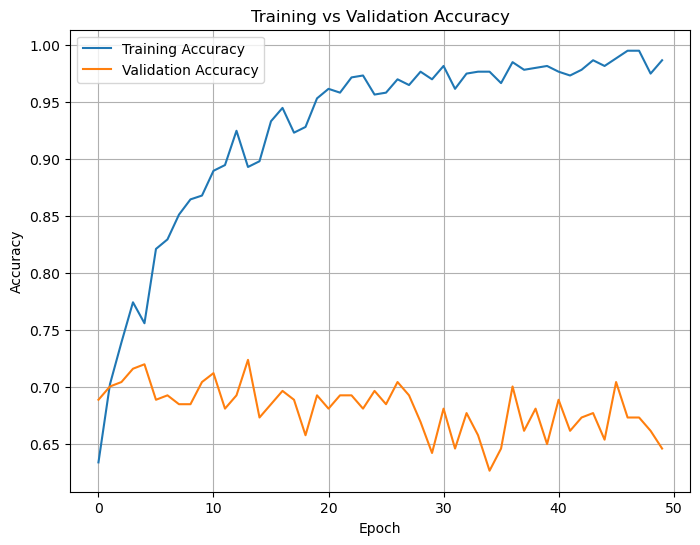

In [ ]:
def plot_training_history(history):
    plt.figure(figsize=(8,6))
    
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_history(history)

In [ ]:
predicted_probabilities = model_dnn.predict(X_test)
predicted_probabilities = np.rint(predicted_probabilities)
new_row = {'Model': ['DNN'], 'Accuracy': accuracy_score(y_test, predicted_probabilities)}
model_results_df.loc[len(model_results_df)] = new_row
print("DNN")
print("Accuracy:", accuracy_score(y_test, predicted_probabilities))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
DNN
Accuracy: 0.6770428015564203


## Random Forest

In [ ]:
clf = RandomForestClassifier(max_depth=1000, random_state=42)
clf.fit(X_train, y_train)

preds_rf = clf.predict(X_test)
new_row = {'Model': ['Random Forest'], 'Accuracy': accuracy_score(y_test, preds_rf)}
model_results_df.loc[len(model_results_df)] = new_row
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, preds_rf))

Random Forest
Accuracy: 0.7042801556420234


## KNN

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

preds_knn = neigh.predict(X_test)
new_row = {'Model': ['KNN'], 'Accuracy': accuracy_score(y_test, preds_knn)}
model_results_df.loc[len(model_results_df)] = new_row
print("KNN")
print("Accuracy:", accuracy_score(y_test, preds_knn))

KNN
Accuracy: 0.6536964980544747


## Decision Tree Classifier

In [ ]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

preds_dtc = dtc.predict(X_test)
new_row = {'Model': ['Decision Tree Classifier'], 'Accuracy': accuracy_score(y_test, preds_dtc)}
model_results_df.loc[len(model_results_df)] = new_row
print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, preds_dtc))

Decision Tree
Accuracy: 0.6381322957198443


## SVM

In [ ]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

preds_svm = svm_model.predict(X_test)
new_row = {'Model': ['SVM'], 'Accuracy': accuracy_score(y_test, preds_svm)}
model_results_df.loc[len(model_results_df)] = new_row
print("svm")
print("Accuracy:", accuracy_score(y_test, preds_svm))

svm
Accuracy: 0.7120622568093385


## Gaussian NB

In [ ]:
gnb = GaussianNB()

gnb_preds = gnb.fit(X_train, y_train).predict(X_test)
new_row = {'Model': ['Gaussian NB'], 'Accuracy': accuracy_score(y_test, gnb_preds)}
model_results_df.loc[len(model_results_df)] = new_row
print("gaussianNB")
print("Accuracy:", accuracy_score(y_test, gnb_preds))

gaussianNB
Accuracy: 0.6498054474708171


## Confusion Matrices

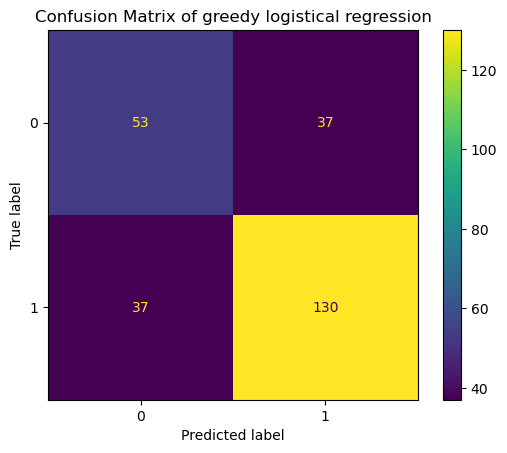

In [ ]:
predicted_labels = greedy_lr.predict(X_test[selected_features])

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of greedy logistical regression")
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


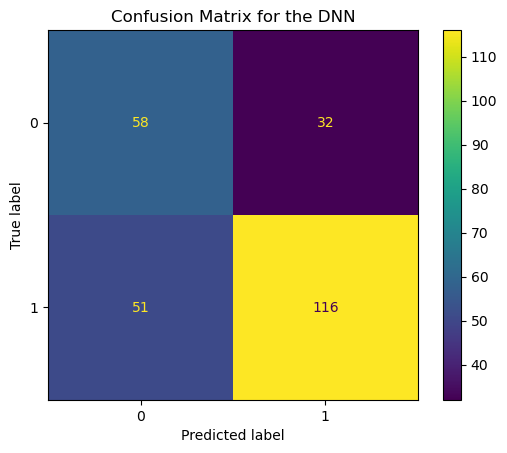

In [ ]:
predicted_probabilities = model_dnn.predict(X_test)
predicted_labels = np.rint(predicted_probabilities) 


cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix for the DNN")
plt.show()

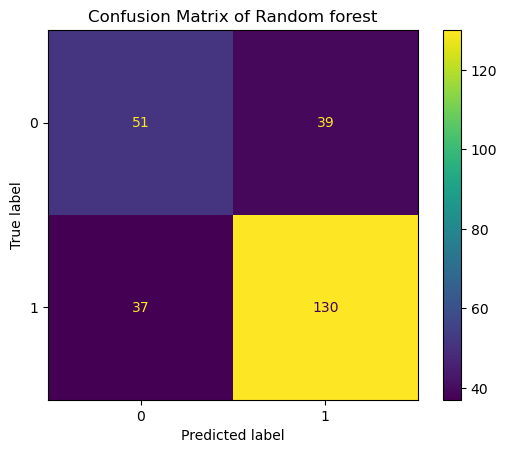

In [ ]:
predicted_labels = clf.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of Random forest")
plt.show()

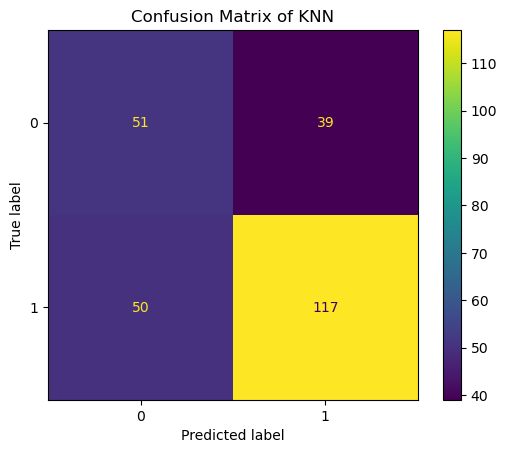

In [ ]:
predicted_labels = neigh.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of KNN")
plt.show()

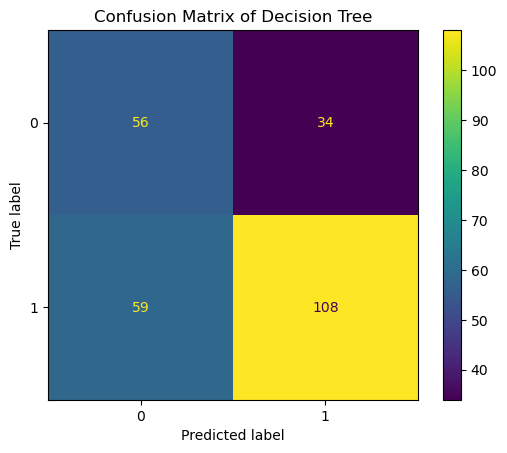

In [ ]:
predicted_labels = dtc.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of Decision Tree")
plt.show()

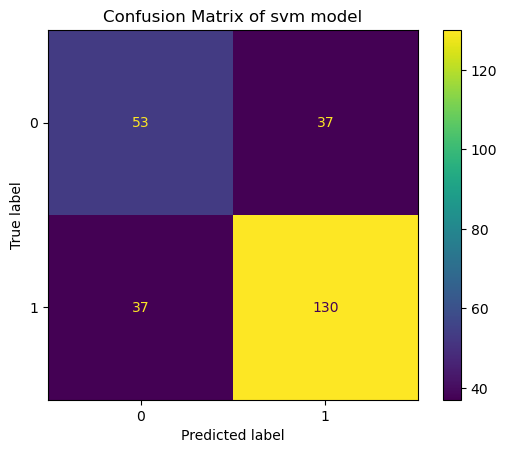

In [ ]:
predicted_labels = svm_model.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of svm model")
plt.show()

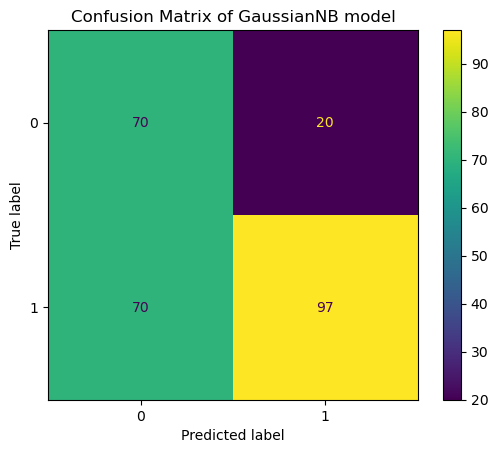

In [ ]:
predicted_labels = gnb.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of GaussianNB model")
plt.show()

## Dimensionality Reduction

In [ ]:
df_reduced = df_all_scaled.copy()

df_reduced = df_reduced.drop(columns=['TEAM NO'])

svd = TruncatedSVD(n_components=10, random_state=42) 
X_svd = svd.fit_transform(df_reduced)
X_svd.shape

(924, 10)

In [ ]:
df_10d = pd.DataFrame(X_svd)
df_10d["TEAM NO"] = df_all_scaled['TEAM NO']

In [ ]:
pred_winners2 = []
true_winners2 = []
difference_vectors2 = []

skipped = 0  # Track skipped matchups

for matchup in matchups:
    team_1_NO = str(matchup[0])
    team_0_NO = str(matchup[1])

    # Look up rows in df_10d
    team_1_row = df_10d[df_10d["TEAM NO"] == team_1_NO]
    team_0_row = df_10d[df_10d["TEAM NO"] == team_0_NO]

    if not team_1_row.empty and not team_0_row.empty:
        true_winners2.append(matchup[2])

        # Drop TEAM NO and convert to numpy arrays
        team_1_vector = team_1_row.drop(columns=["TEAM NO"]).iloc[0].values
        team_0_vector = team_0_row.drop(columns=["TEAM NO"]).iloc[0].values

        # Compute difference vector
        difference_vector = team_1_vector - team_0_vector
        difference_vectors2.append(difference_vector)
    else:
        skipped += 1

print(f"✅ Finished creating reduced difference vectors. Skipped {skipped} matchups.")

# Convert to DataFrame
X = pd.DataFrame(difference_vectors2, columns=[f"SVD_{i+1}" for i in range(10)])
y = np.array(true_winners2)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

✅ Finished creating reduced difference vectors. Skipped 152 matchups.


### Logistic Regression

In [ ]:
LR_model_dr = LogisticRegression()
LR_model_dr.fit(X_train, y_train)

predicted_winners = LR_model_dr.predict(X_test)
new_row = {'Model': ['Feature Reduced Linear Regression'], 'Accuracy': accuracy_score(y_test, predicted_winners)}
model_results_df.loc[len(model_results_df)] = new_row
print("Accuracy:", accuracy_score(y_test, predicted_winners))

Accuracy: 0.7120622568093385


### Greedy Logistic Regression

In [ ]:
# Greedy logistic regression
greedy_lr_dr = LogisticRegression(max_iter=1000, random_state=42)
feature_scores = {}

# First, score each feature individually
for feature in X_train.columns:
    score = cross_val_score(greedy_lr_dr, X_train[[feature]], y_train, cv=10, scoring='accuracy').mean()
    feature_scores[feature] = score

# Sort features by their single-feature performance
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

selected_features = []
best_score = 0

for feature, _ in sorted_features:
    current_features = selected_features + [feature]
    score = cross_val_score(greedy_lr_dr, X_train[current_features], y_train, cv=10, scoring='accuracy').mean()
    
    if score > best_score:
        selected_features.append(feature)
        best_score = score
        print(f"✅ Added: {feature} | New CV Accuracy: {score:.4f}")
    else:
        print(f"❌ Skipped: {feature} | CV Accuracy would be: {score:.4f}")


greedy_lr_dr.fit(X_train[selected_features], y_train)


predicted_winners_glr_dr = greedy_lr_dr.predict(X_test[selected_features])
new_row = {'Model': ['Feature Reduced Greedy Linear Regression'], 'Accuracy': accuracy_score(y_test, predicted_winners_glr_dr)}
model_results_df.loc[len(model_results_df)] = new_row
print("Accuracy:", accuracy_score(y_test, predicted_winners_glr_dr))

✅ Added: SVD_1 | New CV Accuracy: 0.6740
✅ Added: SVD_7 | New CV Accuracy: 0.6856
✅ Added: SVD_2 | New CV Accuracy: 0.6874
✅ Added: SVD_3 | New CV Accuracy: 0.6890
✅ Added: SVD_4 | New CV Accuracy: 0.6907
❌ Skipped: SVD_5 | CV Accuracy would be: 0.6890
✅ Added: SVD_6 | New CV Accuracy: 0.6940
✅ Added: SVD_8 | New CV Accuracy: 0.6940
❌ Skipped: SVD_10 | CV Accuracy would be: 0.6940
❌ Skipped: SVD_9 | CV Accuracy would be: 0.6890
Accuracy: 0.7159533073929961


### DNN

Epoch 1/50


c:\Users\dornerj\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5677 - loss: 0.7270 - val_accuracy: 0.7121 - val_loss: 0.5718
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6593 - loss: 0.6031 - val_accuracy: 0.7237 - val_loss: 0.5757
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6578 - loss: 0.5845 - val_accuracy: 0.6809 - val_loss: 0.5884
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6638 - loss: 0.5980 - val_accuracy: 0.7121 - val_loss: 0.5762
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6666 - loss: 0.5861 - val_accuracy: 0.7198 - val_loss: 0.5862
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7394 - loss: 0.5357 - val_accuracy: 0.7004 - val_loss: 0.5932
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6982 - loss: 0.5815 - val_accuracy: 0.6926 - val_loss: 0.5977
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6884 - loss: 0.5494 - val_accuracy: 0.6965 - val_loss: 0.6254
Ep

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 400)            │         4,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 976,805 (3.73 MB)

 Trainable params: 325,601 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 651,204 (2.48 MB)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy on train set: 93.14%
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy on test set: 63.42%
[[ 50  40]
 [ 54 113]]


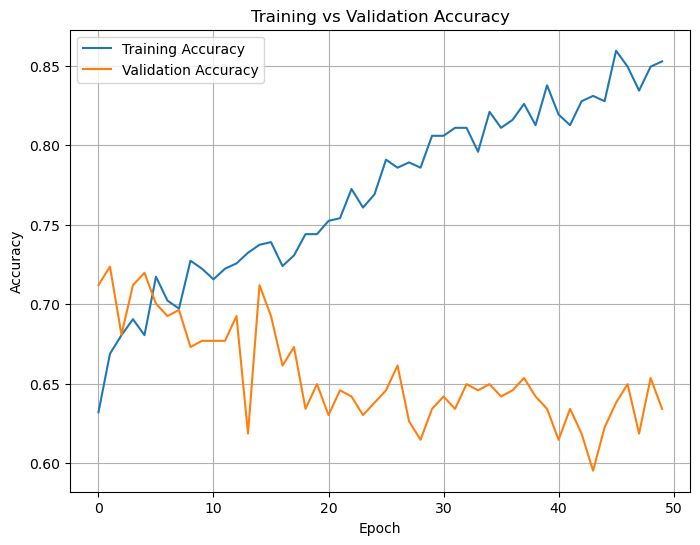

In [ ]:
history_dr, model_dnn_dr = run_binary_mlp(X_train, y_train, X_test, y_test,400,50)
plot_training_history(history_dr)

In [ ]:
predicted_probabilities = model_dnn_dr.predict(X_test)
predicted_probabilities = np.rint(predicted_probabilities)
print("DNN")
new_row = {'Model': ['Feature Reduced DNN'], 'Accuracy': accuracy_score(y_test, predicted_probabilities)}
model_results_df.loc[len(model_results_df)] = new_row
print("Accuracy:", accuracy_score(y_test, predicted_probabilities))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
DNN
Accuracy: 0.6342412451361867


### Random Forest Classifer

In [ ]:
clf = RandomForestClassifier(max_depth=1000, random_state=42)
clf.fit(X_train, y_train)

preds_rf = clf.predict(X_test)
new_row = {'Model': ['Feature Reduced Random Forest'], 'Accuracy': accuracy_score(y_test, preds_rf)}
model_results_df.loc[len(model_results_df)] = new_row
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, preds_rf))

Random Forest
Accuracy: 0.6770428015564203


### KNN

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

preds_knn = neigh.predict(X_test)
new_row = {'Model': ['Feature Reduced KNN'], 'Accuracy': accuracy_score(y_test, preds_knn)}
model_results_df.loc[len(model_results_df)] = new_row
print("KNN")
print("Accuracy:", accuracy_score(y_test, preds_knn))

KNN
Accuracy: 0.642023346303502


### Decision Tree Classifier

In [ ]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

preds_dtc = dtc.predict(X_test)
new_row = {'Model': ['Feature Reduced Decision Tree Classifier'], 'Accuracy': accuracy_score(y_test, preds_dtc)}
model_results_df.loc[len(model_results_df)] = new_row
print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, preds_dtc))


Decision Tree
Accuracy: 0.5914396887159533


### SVM

In [ ]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

preds_svm = svm_model.predict(X_test)
new_row = {'Model': ['Feature Reduced SVM'], 'Accuracy': accuracy_score(y_test, preds_svm)}
model_results_df.loc[len(model_results_df)] = new_row
print("svm")
print("Accuracy:", accuracy_score(y_test, preds_svm))

svm
Accuracy: 0.7042801556420234


### Gaussian NB

In [ ]:
gnb = GaussianNB()

gnb_preds = gnb.fit(X_train, y_train).predict(X_test)
new_row = {'Model': ['Feature Reduced Gaussian NB'], 'Accuracy': accuracy_score(y_test, gnb_preds)}
model_results_df.loc[len(model_results_df)] = new_row
print("gaussianNB")
print("Accuracy:", accuracy_score(y_test, gnb_preds))

gaussianNB
Accuracy: 0.688715953307393


### Confusion Matrices

Accuracy: 0.7120622568093385


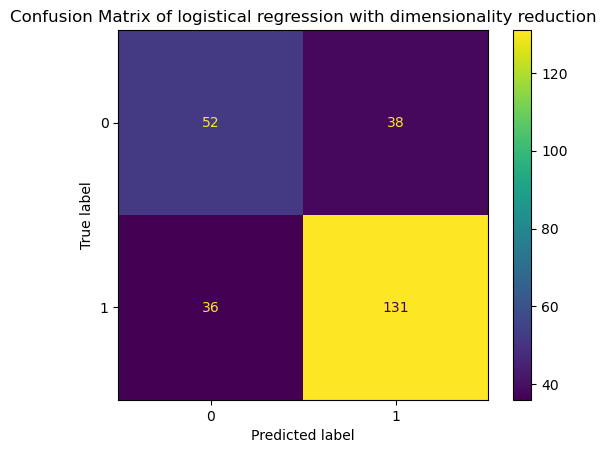

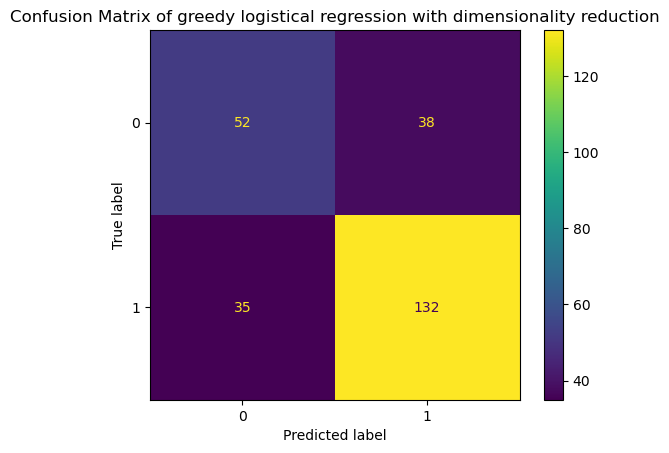

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


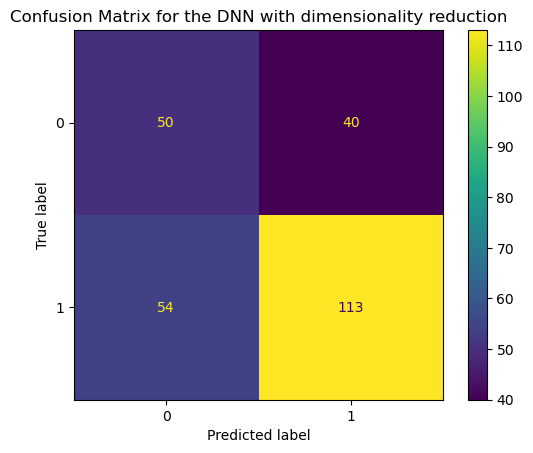

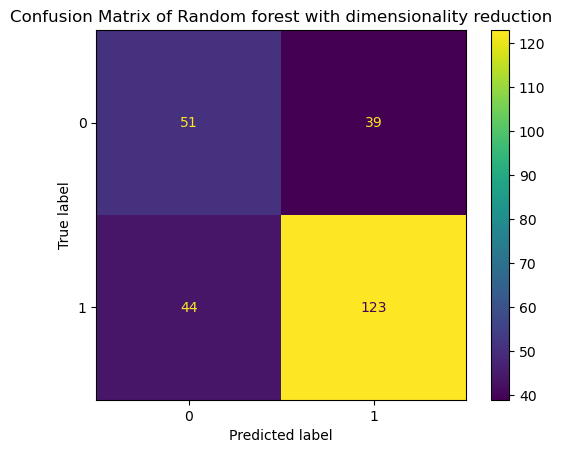

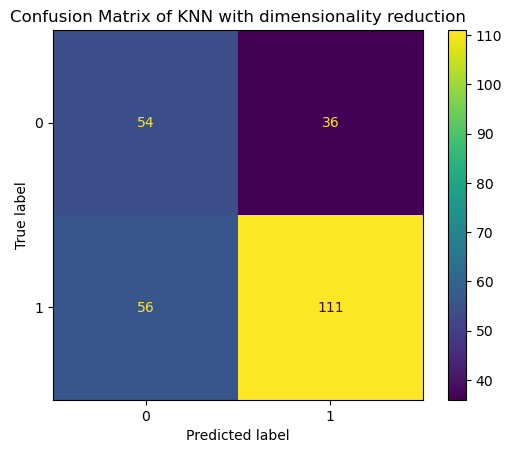

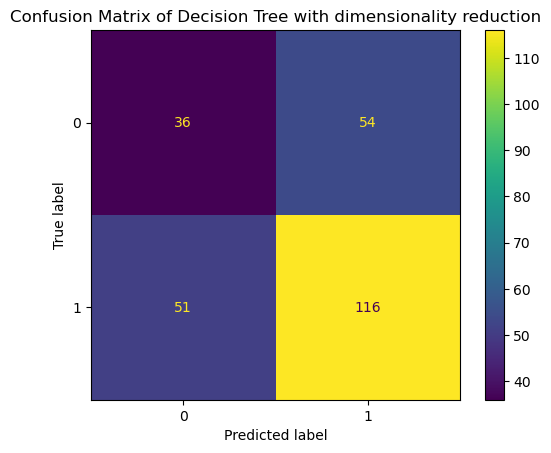

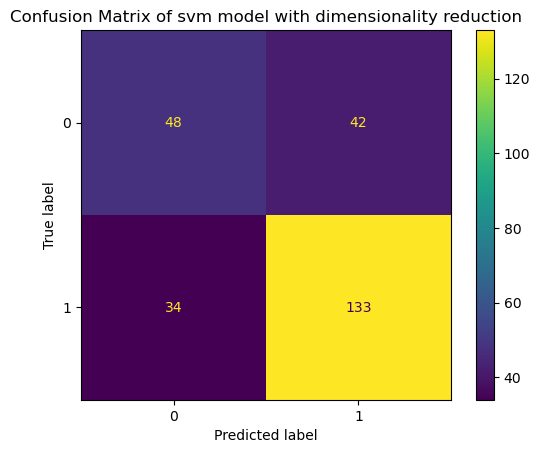

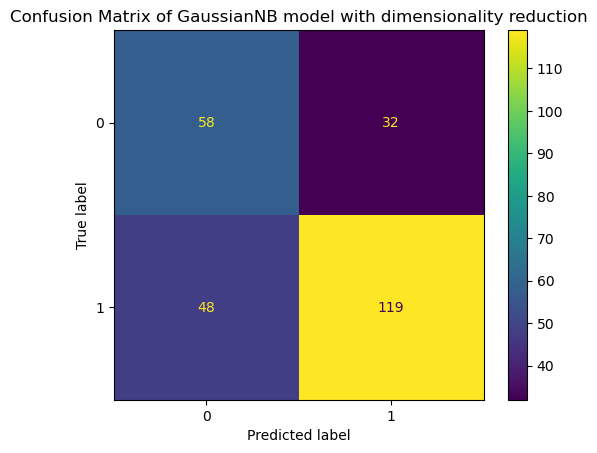

In [ ]:
predicted_labels = LR_model_dr.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)

print("Accuracy:", accuracy_score(y_test, predicted_labels))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of logistical regression with dimensionality reduction")
plt.show()


predicted_labels = greedy_lr_dr.predict(X_test[selected_features])

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of greedy logistical regression with dimensionality reduction")
plt.show()

predicted_probabilities = model_dnn_dr.predict(X_test)
predicted_labels = np.rint(predicted_probabilities) 


cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix for the DNN with dimensionality reduction")
plt.show()

predicted_labels = clf.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of Random forest with dimensionality reduction")
plt.show()

predicted_labels = neigh.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of KNN with dimensionality reduction")
plt.show()

predicted_labels = dtc.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of Decision Tree with dimensionality reduction")
plt.show()

predicted_labels = svm_model.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of svm model with dimensionality reduction")
plt.show()

predicted_labels = gnb.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of GaussianNB model with dimensionality reduction")
plt.show()

In [ ]:
model_results_df

,Model,Accuracy
0,Baseline,0.703078
1,[Linear Regression All],0.669261
2,[Linear Regression Greedy],0.712062
3,[DNN],0.677043
4,[Random Forest],0.704280
5,[KNN],0.653696
6,[Decision Tree Classifier],0.638132
7,[SVM],0.712062
8,[Gaussian NB],0.649805
9,[Feature Reduced Linear Regression],0.712062


In [ ]:
N = len(X_test)

# Ensure 'Model' column contains only strings
model_results_df['Model'] = model_results_df['Model'].apply(lambda x: x[0] if isinstance(x, list) else x)

# Build a dict: { model_name: count_correct }
counts = (
    model_results_df
    .set_index('Model')['Accuracy']
    .mul(N)
    .round()
    .astype(int)
    .to_dict()
)

# Compare only Baseline vs each other model
baseline_model = 'Baseline'
other_models = [m for m in counts.keys() if m != baseline_model]

results = []
for other in other_models:
    c1, c2 = counts[baseline_model], counts[other]
    stat, p = proportions_ztest([c1, c2], [N, N])
    results.append({
        'model_1': baseline_model,
        'model_2': other,
        'z_stat': stat,
        'p_raw': p
    })

res_df = pd.DataFrame(results)

# Bonferroni-corrected alpha
alpha = 0.05
m = len(res_df)
res_df['p_bonf'] = (res_df['p_raw'] * m).clip(upper=1.0)
res_df['significant'] = res_df['p_bonf'] < alpha

# Clean output
res_df['model_pair'] = res_df['model_1'] + " vs " + res_df['model_2']
summary_df = res_df[['model_pair', 'p_bonf', 'significant']].sort_values('p_bonf')

print(summary_df.to_string(index=False))

                                          model_pair   p_bonf  significant
Baseline vs Feature Reduced Decision Tree Classifier 0.118485        False
                   Baseline vs Linear Regression All 1.000000        False
                Baseline vs Linear Regression Greedy 1.000000        False
                                     Baseline vs DNN 1.000000        False
                           Baseline vs Random Forest 1.000000        False
                                     Baseline vs KNN 1.000000        False
                Baseline vs Decision Tree Classifier 1.000000        False
                                     Baseline vs SVM 1.000000        False
                             Baseline vs Gaussian NB 1.000000        False
       Baseline vs Feature Reduced Linear Regression 1.000000        False
Baseline vs Feature Reduced Greedy Linear Regression 1.000000        False
                     Baseline vs Feature Reduced DNN 1.000000        False
           Baseline vs Fe